<a href="https://colab.research.google.com/github/wf-yamaday/machine-learning/blob/master/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%BB%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E8%AB%96/05_PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多項式回帰モデル

PRML のやつ

$y = \sin(2\pi x) + \epsilon$ が観測データで，ノイズ項がガウス分布な
$\epsilon \sim \cal{N}(\epsilon \mid 0, \sigma^2)$
のものを，多項式回帰で評価する

In [0]:
# データ点の個数は N

N = 200
pltxrng=(0, 1.0)
pltyrng=(-1.2, 1.2)

np.random.seed(12345)
x = np.random.uniform(low=0.0, high=1.0, size=N)
#x = np.linspace(0, 1, N)
sgm = 0.2


def truemodel(x): 
    '''真のモデル'''
    return np.sin(2*np.pi*x)

y0 = truemodel(x)
eps = np.random.randn(N) * sgm
y = y0 + eps # 観測データ

d = pd.DataFrame({'x': x, 'y0': y0, 'y': y})


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pylab as plt

import sklearn

## データ生成

乱数はシードで固定しておく

In [0]:
# 評価用データも作成しておく
Neval = 10
xeval = np.random.uniform(low=0.0, high=1.0, size=Neval)
yeval = truemodel(xeval) + sgm * np.random.randn(Neval)

# 真値の曲線データも作成しておこう
xx = np.linspace(pltxrng[0], pltxrng[1], 128)
yytrue = truemodel(xx)


Text(0.5, 1.0, 'Observed')

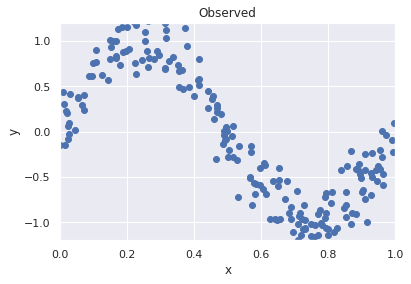

In [0]:
# 学習用データを表示させてみる
plt.figure()

plt.plot(x, y, 'bo')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(pltxrng[0], pltxrng[1])
plt.ylim(pltyrng[0], pltyrng[1])

plt.title('Observed')


Text(0.5, 1.0, 'Observed + Ideal')

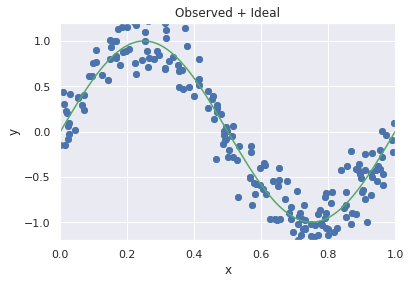

In [0]:
# とりあえず　表示と保持

plt.scatter(data=d, x='x', y='y', c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(pltxrng[0], pltxrng[1])
plt.ylim(pltyrng[0], pltyrng[1])

plt.plot(x, y, 'bo')
plt.plot(xx, yytrue, 'g-')

plt.title('Observed + Ideal')


Text(0.5, 1.0, 'Observed, Eval, Ideal')

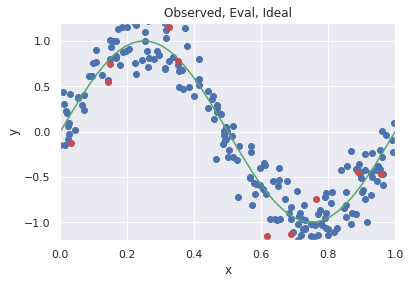

In [0]:
# 真値 緑線
# 観測データ（学習用） 靑点
# 観測データ（評価用） 赤点
# 重ねて表示するとこんな感じ


plt.figure()
plt.scatter(data=d, x='x', y='y', c='b')
plt.plot(xx, yytrue, 'g-')

plt.plot(xeval, yeval, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(pltxrng[0], pltxrng[1])
plt.ylim(pltyrng[0], pltyrng[1])

plt.title('Observed, Eval, Ideal')



## さて回帰問題をといてみよう

### 多項式回帰をやってみる

多項式は，PolynominalFeature で作成できそう．あとはこれを Pipeline でつないでやればできそう．
元ネタは sklearn のチュートリアルにあった（はず）

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [0]:
# とりあえず　7 次式でことに当たる

M = 7

model = Pipeline([('poly', PolynomialFeatures(degree=M)), ('linear', LinearRegression(fit_intercept=True))])
model.fit(d['x'][:, np.newaxis], d['y'])

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=7, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Residual:  0.03911197225275


Text(0.5, 1.0, 'Polynomial Regression (7th)')

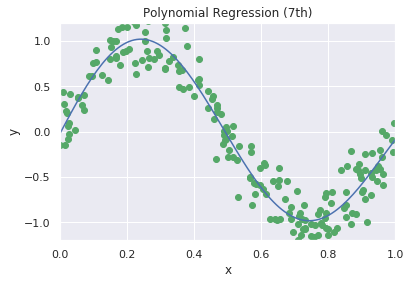

In [0]:
# じゃあ plot してみよう
plt.scatter(data=d, x='x', y='y', c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(pltxrng[0], pltxrng[1])
plt.ylim(pltyrng[0], pltyrng[1])


yy = model.predict(xx[:, np.newaxis])

print('Residual: ', np.mean((model.predict(d['x'][:, np.newaxis]) - d['y'])**2))

plt.plot(xx, yy)
plt.title('Polynomial Regression (7th)')


In [0]:
# どうやら model 中の steps メンバのなかに目的のものがありそう
print(model.steps)

# 係数を引っ張りだす．pipeline は，steps に処理のオブジェクトが入っている．
# 線形基底関数は 2番目のステップなので [1] 番目のリスト．取りだすと，
print(model.steps[1])

model.steps[1][1].coef_

[('poly', PolynomialFeatures(degree=7, include_bias=True, interaction_only=False,
                   order='C')), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))]
('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))


array([   0.        ,    7.00463282,   -1.59840823,  -48.68914293,
         11.26956743,  133.52481072, -145.51008635,   43.92227354])

Residual(00): 5.368780e-01
-0.08963691515420788
[0.]
Residual(01): 2.357541e-01
0.9010829088825936
[ 0.         -1.88021897]
Residual(02): 2.355711e-01
0.9306534789750048
[ 0.         -2.05972979  0.17919846]
Residual(03): 4.380514e-02
-0.11808352539706299
[  0.          11.37729596 -33.71066482  22.65603285]
Residual(04): 4.317992e-02
-0.17935409147026413
[  0.          12.78028654 -40.23651374  32.94314091  -5.1823921 ]
Residual(05): 3.912949e-02
-0.010612765819424691
[  0.           6.68790153   4.13807265 -86.96017338 130.49912881
 -54.46852796]
Residual(06): 3.912243e-02
-0.002357194424312231
[   0.            6.28124495    8.26147951 -103.37934173  161.06355877
  -81.18915083    8.86090709]
Residual(07): 3.911197e-02
-0.013819069854930394
[   0.            7.00463282   -1.59840823  -48.68914293   11.26956743
  133.52481072 -145.51008635   43.92227354]
Residual(08): 3.883949e-02
0.05018007666020555
[ 0.00000000e+00  2.06432542e+00  8.53129932e+01 -6.84301860e+02
  2.38386653e+03 -

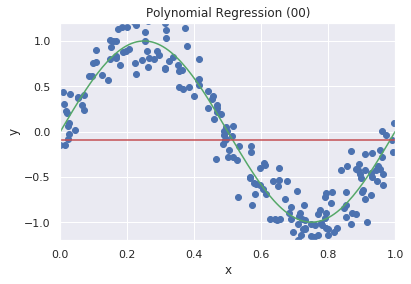

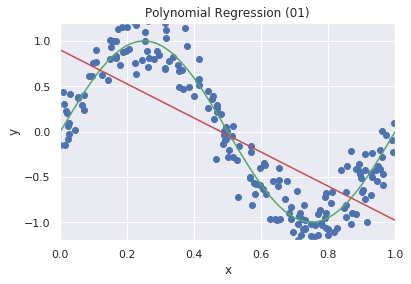

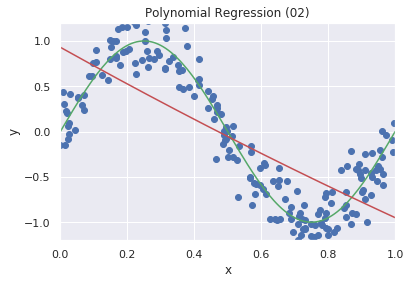

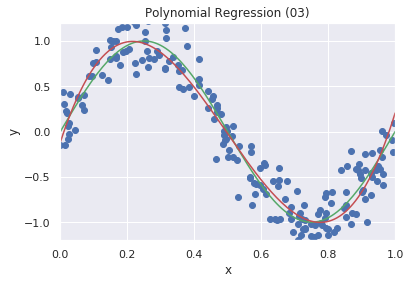

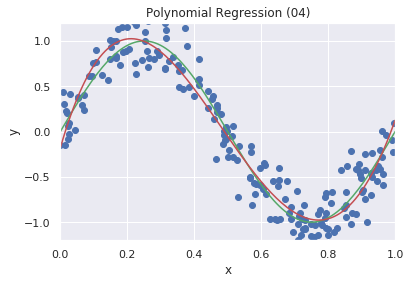

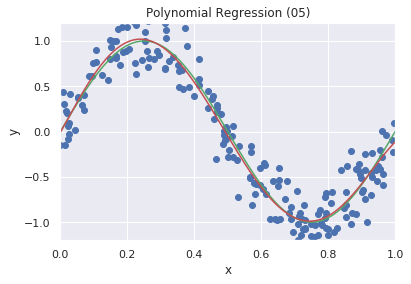

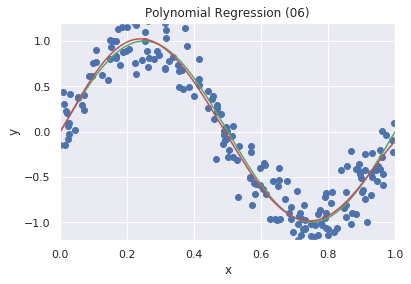

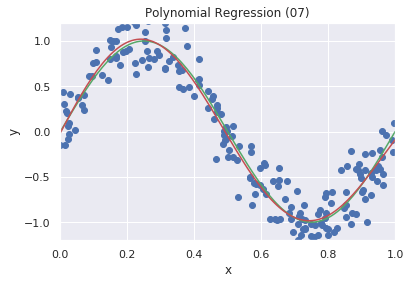

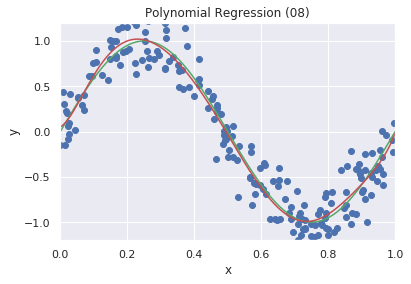

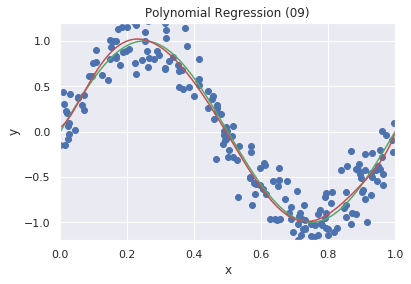

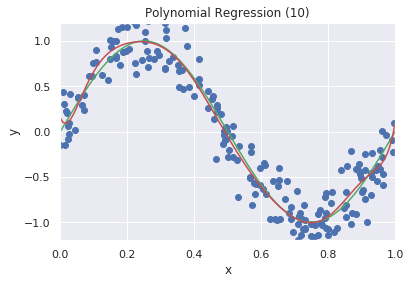

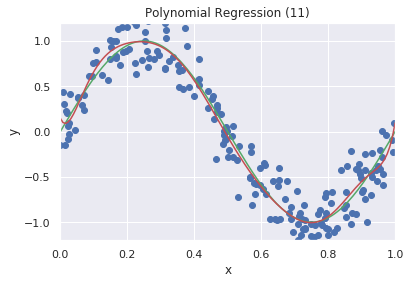

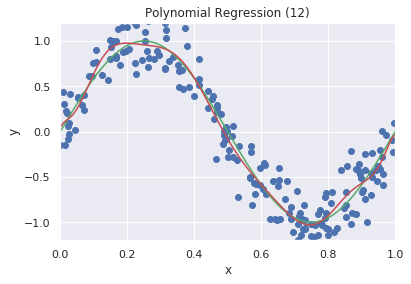

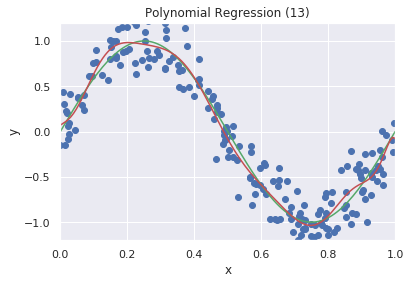

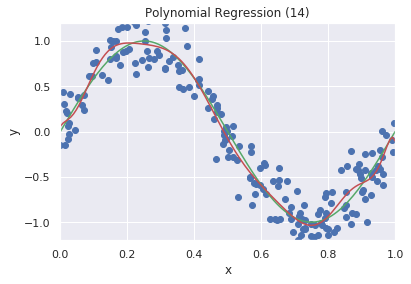

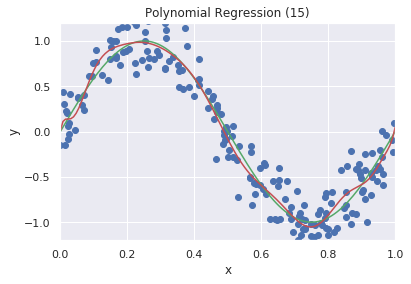

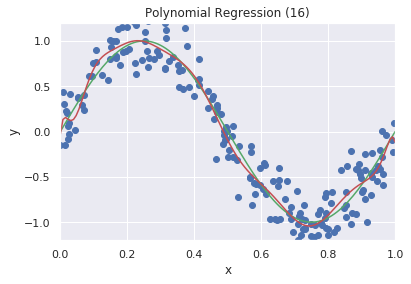

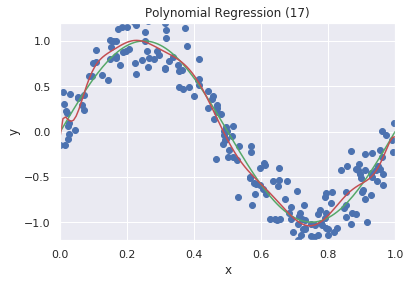

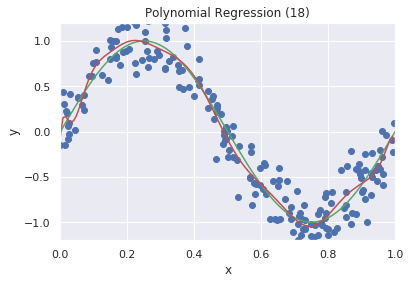

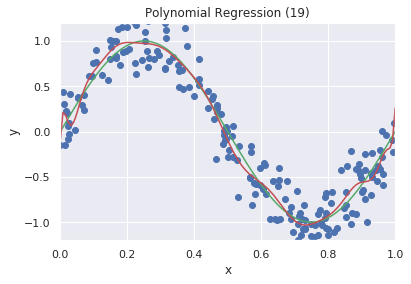

In [0]:
# なんかできているぽい．
# じゃあ，普通に全部でやってみよう

M = 20

def MeanSquareAverage(ypred, yref):
    return np.mean((ypred - yref)**2)

w = np.zeros((M, M))
Res = []
ResEval = []

for m in range(M):
    model = Pipeline([('poly', PolynomialFeatures(degree=m)), ('linear', LinearRegression(fit_intercept=True))])
    model.fit(d['x'][:, np.newaxis], d['y'])
    
    plt.figure()
    plt.scatter(data=d, x='x', y='y', c='b')
    plt.plot(xx, yytrue, 'g-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(pltxrng[0], pltxrng[1])
    plt.ylim(pltyrng[0], pltyrng[1])

    yy = model.predict(xx[:, np.newaxis])
    rtrain = MeanSquareAverage(model.predict(d['x'][:, np.newaxis]), d['y'])
    print('Residual(%02d): %8e' % (m, rtrain) )
    reval = MeanSquareAverage(model.predict(xeval[:, np.newaxis]), yeval)
    Res.append(rtrain)
    ResEval.append(reval)

    plt.plot(xx, yy, 'r-')
    plt.title('Polynomial Regression (%02d)' % (m))

    
    # 係数を引っ張りだす．pipeline は，steps に処理のオブジェクトが入っている．
    # 線形基底関数は 2番目のステップなので [1] 番目のリスト．取りだすと，
    print(model.steps[1][1].intercept_)
    print(model.steps[1][1].coef_)
    
    w[m, 0] = model.steps[1][1].intercept_
    w[m, 1:1+m] = model.steps[1][1].coef_[1:]

Text(0.5, 1.0, 'Mean Square Average')

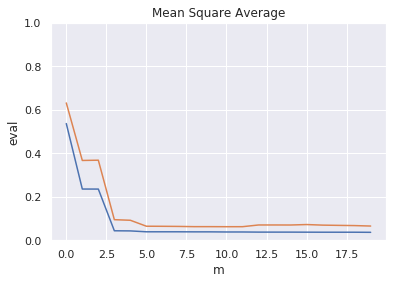

In [0]:
# 平均自乗誤差をプロットしてみる

plt.plot(np.arange(M), Res)
plt.plot(np.arange(M), ResEval)
plt.ylim(0, 1)
plt.xlabel('m')
plt.ylabel('eval')
plt.title('Mean Square Average')
